In [1]:
## set paths to catalog/script files and output directories (for plots)
data_dir = '../hdf5files/'
script_dir = '../SIP_jerome_scripts2/'
out_dir = '/Users/Andy/Desktop/'

In [2]:
## load plotting routines
execfile(script_dir+'plot_routines.py')

In [3]:
# read in files
gds = Table.read(data_dir+'gds.hdf5')

/Users/Andy/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# making cuts
gds_selection = np.where ( \
                          (gds['PhotFlag']==0) &\
                          (gds['CLASS_STAR']>0.9) & \
                          (gds['ACS_F606W_FLUX'] > 0) &\
                         (gds['ACS_F814W_FLUX'] > 0) &\
                          (gds['WFC3_F125W_FLUX'] > 0) &\
                         (gds['WFC3_F160W_FLUX'] > 0))

# last 3 conditions ensure log10() exists

In [5]:
# brightness cut
gds_temp = gds[gds_selection]
gds_selection2 = np.where ( \
                          -2.5*np.log10(gds_temp['WFC3_F125W_FLUX']) <= 1.359465)
gds_final = gds_temp[gds_selection2]

In [6]:
# length of array
total_length = len(gds_final)
print total_length

224


In [7]:
## define variables for GOODS-S
# conversion from flux to mag
f606_gds_flux = gds_final['ACS_F606W_FLUX']
f814_gds_flux = gds_final['ACS_F814W_FLUX']  ## rest-frame .814 μm magnitude
f125_gds_flux = gds_final['WFC3_F125W_FLUX']   ## rest-frame 1.25 μm magnitude
f160_gds_flux = gds_final['WFC3_F160W_FLUX']   ## rest-frame 1.60 μm magnitude

f606_gds_mag = -2.5*np.log10(f606_gds_flux)
f814_gds_mag = -2.5*np.log10(f814_gds_flux)
f125_gds_mag = -2.5*np.log10(f125_gds_flux)
f160_gds_mag = -2.5*np.log10(f160_gds_flux)

f606_f814_gds = f606_gds_mag - f814_gds_mag
f814_f125_gds = f814_gds_mag - f125_gds_mag
f125_f160_gds = f125_gds_mag - f160_gds_mag

# mstar_gds = gds_final['M_med'] # already logged?
# z_gds = gds_final['z_best']  ## redshift

In [8]:
# f606_814_gds is the original y-values and f814_f125 is the original x-values
# returns the new array f814_f125 based on sort of f606_f184 (explanation: https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list)
f814_f125_gds_sorted1 = [x for _,x in sorted(zip(f606_f814_gds,f814_f125_gds))]
# sorts f606_f814
f606_f814_gds_sorted1 = np.sort(f606_f814_gds)
# define the moving median arrays
movingmedian_f606_f814_gds1 = np.array([])
movingmedian_f814_f125_gds1 = np.array([])
# scanning through all elements up to the 15th to the last
for i in range (0,total_length-15):
    data2 = np.array([])
    # creating an array of the 15 elements
    for j in range(i,i+15):
        data2 = np.append(data2,f606_f814_gds_sorted1[j])
    # adding the median of the 15 elements to the moving median array
    movingmedian_f606_f814_gds1 = np.append(movingmedian_f606_f814_gds1,np.median(data2))
# repeating for the x-values
for k in range (0,total_length-15):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f814_f125_gds_sorted1[l])
    movingmedian_f814_f125_gds1 = np.append(movingmedian_f814_f125_gds1,np.median(data3))
# print movingmedian_f606_f814_gds1

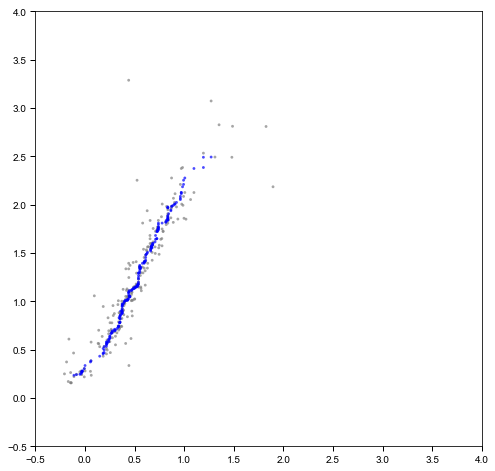

In [9]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f814_f125_gds_sorted1,f606_f814_gds_sorted1,c='grey',edgecolors='none',s=8,alpha=0.7)
plt.scatter(movingmedian_f814_f125_gds1,movingmedian_f606_f814_gds1,c='blue',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.savefig(out_dir+'GIJ_pt4_gds_starlike_movingmedian.pdf')

[0.54218384 0.0849413  0.08210703 ... 0.12757091 0.03563769 0.69575107]


(array([63., 40., 25., ...,  0.,  0.,  1.]),
 array([0.        , 0.01391502, 0.02783004, ..., 0.66792102, 0.68183605,
        0.69575107]),
 <a list of 50 Patch objects>)

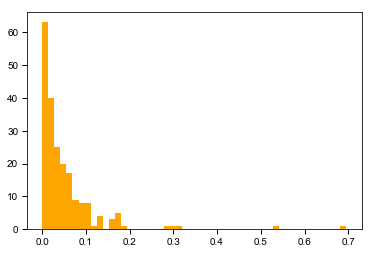

In [10]:
# array of all the points' distances from the moving median line
distance_606_814_125_gds = np.array([])
# looks through every point to find each one's distance from the median line
for m in range(0,total_length-15):
    # arbitrary large value for the initialization of min_distance
    min_distance = 99999
    # loop through all moving median points to find the shortest distance from that specific point to the moving median
    for n in range(0,total_length-15):
        dist = math.sqrt((movingmedian_f606_f814_gds1[n]-f606_f814_gds_sorted1[m])**2+(movingmedian_f814_f125_gds1[n]-f814_f125_gds_sorted1[m])**2)
        # condition to replace min_distance
        if (dist < min_distance):
            min_distance = dist
    distance_606_814_125_gds = np.append(distance_606_814_125_gds,min_distance)
print distance_606_814_125_gds
plt.hist(distance_606_814_125_gds,50,color='orange')

In [11]:
# another moving median
f125_f160_gds_sorted2 = [x for _,x in sorted(zip(f814_f125_gds,f125_f160_gds))]
f814_f125_gds_sorted2 = np.sort(f814_f125_gds)
movingmedian_f814_f125_gds2 = np.array([])
movingmedian_f125_f160_gds2 = np.array([])
for i in range (0,total_length-15):
    data2 = np.array([])
    for j in range(i,i+15):
        data2 = np.append(data2,f814_f125_gds_sorted2[j])
    movingmedian_f814_f125_gds2 = np.append(movingmedian_f814_f125_gds2,np.median(data2))
for k in range (0,total_length-15):
    data3 = np.array([])
    for l in range(k,k+15):
        data3 = np.append(data3,f125_f160_gds_sorted2[l])
    movingmedian_f125_f160_gds2 = np.append(movingmedian_f125_f160_gds2,np.median(data3))

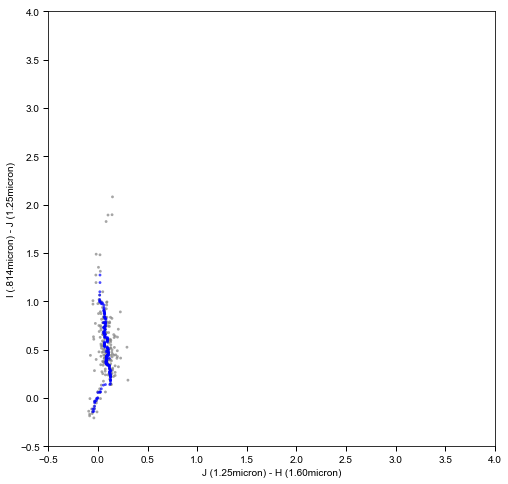

In [12]:
fig=plt.figure(figsize=(8,8))
plt.scatter(f125_f160_gds_sorted2,f814_f125_gds_sorted2,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.scatter(movingmedian_f125_f160_gds2,movingmedian_f814_f125_gds2,c='blue',edgecolors='none',s=8,alpha=0.7)
plt.xlim(-0.5,4)
plt.ylim(-0.5,4)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig(out_dir+'IJH_pt4_gds_starlike_movingmedian.pdf')

[0.43744569 0.06486097 0.0539025  ... 0.01026425 0.03787061 0.04409397]


(array([70., 29., 22., ...,  0.,  0.,  1.]),
 array([0.        , 0.00874891, 0.01749783, ..., 0.41994786, 0.42869677,
        0.43744569]),
 <a list of 50 Patch objects>)

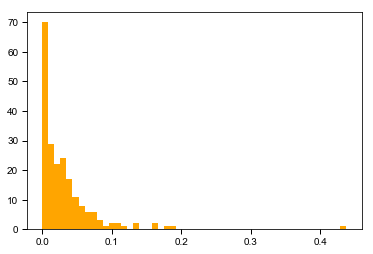

In [13]:
distance_814_125_160_gds = np.array([])
for m in range(0,total_length-15):
    min_distance = 99999
    for n in range(0,total_length-15):
        dist = math.sqrt((movingmedian_f814_f125_gds2[n]-f814_f125_gds_sorted2[m])**2+(movingmedian_f125_f160_gds2[n]-f125_f160_gds_sorted2[m])**2)
        if (dist < min_distance):
            min_distance = dist
    distance_814_125_160_gds = np.append(distance_814_125_160_gds,min_distance)
print distance_814_125_160_gds
plt.hist(distance_814_125_160_gds,50,color='orange')

In [14]:
distance1_gds = np.array([]) # distance of x-value of GIJ from the moving median
distance2_gds = np.array([]) # distance of x-value of IJH from the moving median
for i in range (7,total_length-15):
    distance1_gds = np.append(distance1_gds,movingmedian_f814_f125_gds1[i-7]-f814_f125_gds_sorted1[i])
    distance2_gds = np.append(distance2_gds,movingmedian_f125_f160_gds2[i-7]-f814_f125_gds_sorted2[i])

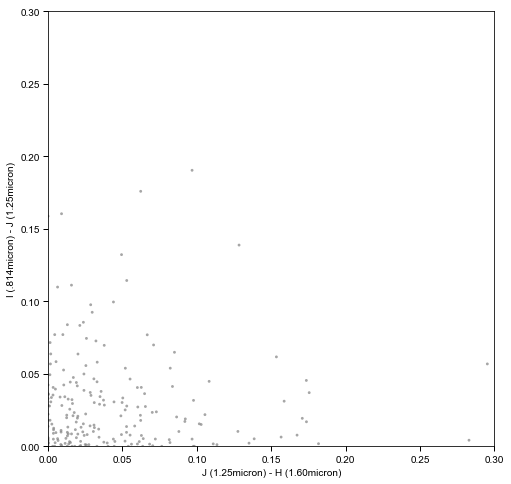

In [15]:
fig=plt.figure(figsize=(8,8))
plt.scatter(distance_606_814_125_gds,distance_814_125_160_gds,c='gray',edgecolors='none',s=8,alpha=0.7)
plt.xlim(0,0.3)
plt.ylim(0,0.3)
plt.xlabel('J (1.25micron) - H (1.60micron)')
plt.ylabel('I (.814micron) - J (1.25micron)')
plt.savefig(out_dir+'distance_diagram_gds.pdf')